# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [32]:
import common

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

Populating the interactive namespace from numpy and matplotlib


## Постоянные

In [33]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Общее

### Ниже представлено сравнение характеристик установок на режимах частичной мощности. Условия сравнения следующие: 
1. Степень повышения давления компрессоров выбиралась из условия максимального КПД на номинальном режиме работы.
2. Температура основной камеры сгорания: 1450 К.
3. Номинальная мощность 16 МВт
4. Для трехвальных схем характеристика на номинальном режиме строится при одинаковых степенях повышения давления в обоих компрессорах

## Двухвальная установка без регенератора

### Загрузка данных

In [34]:
d2n = pd.read_json(data_root + '2n.json').sort_values('t')
d2ns = pd.read_json(data_root + '2n_simple.json')

### Выведем параметры установки в точке максимального КПД

In [35]:
common.get_2_shaft_nominal_parameters_note(
    d2ns[d2ns.efficiency == d2ns.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [36]:
common.get_2_shaft_nominal_parameters_note(
    d2ns[d2ns.specific_power == d2ns.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

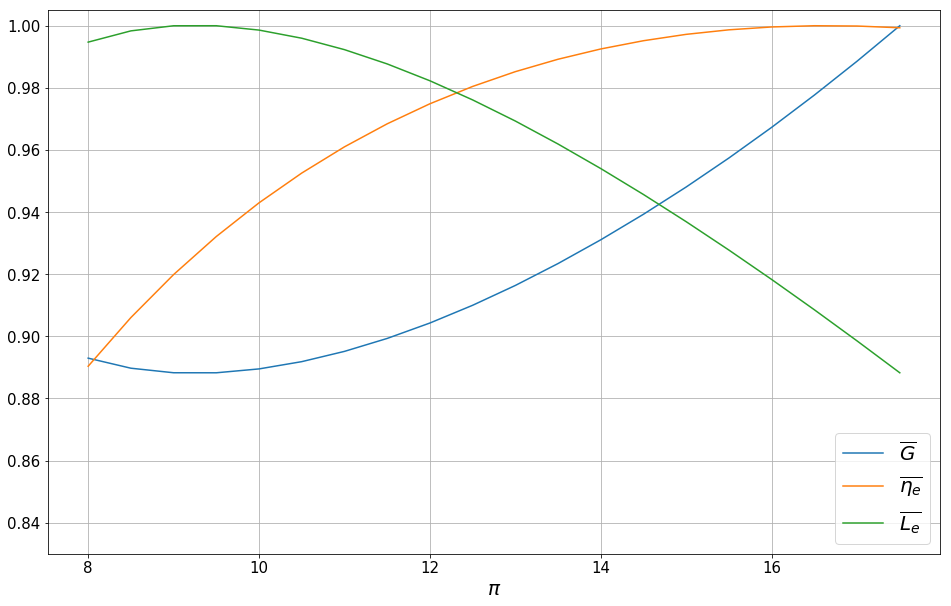

In [37]:
common.plot_nom_characteristic(d2ns)
plt.show()

### Построим характеристику установки на режимах частичной мощности

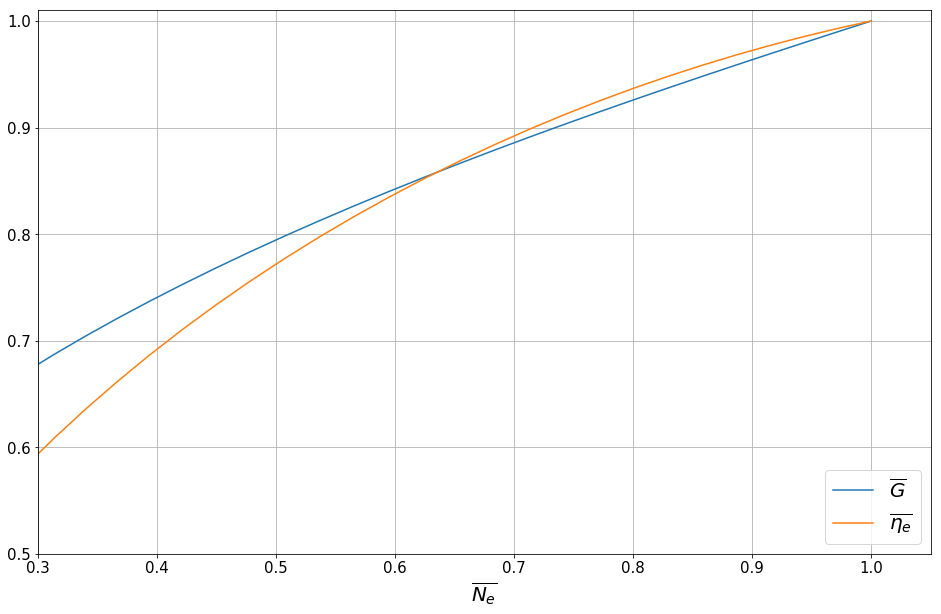

In [38]:
common.plot_common_characteristics(d2n)
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [39]:
d2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
d2nrs = pd.read_json(data_root + '2nr_simple.json')

### Выведем параметры установки в точке максимального КПД

In [40]:
common.get_2_shaft_nominal_parameters_note(
    d2nrs[d2nrs.efficiency == d2nrs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [41]:
common.get_2_shaft_nominal_parameters_note(
    d2nrs[d2nrs.specific_power == d2nrs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

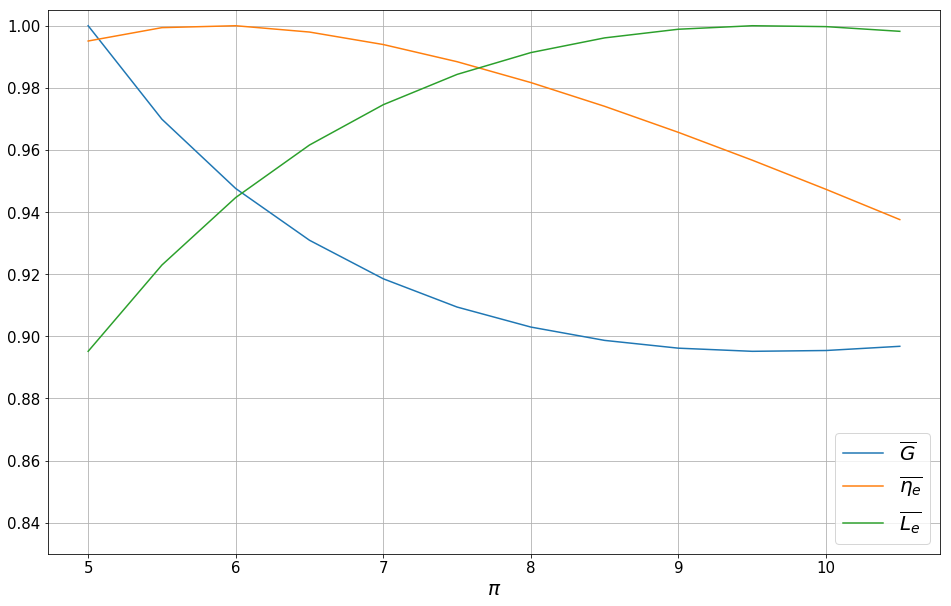

In [42]:
common.plot_nom_characteristic(d2nrs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

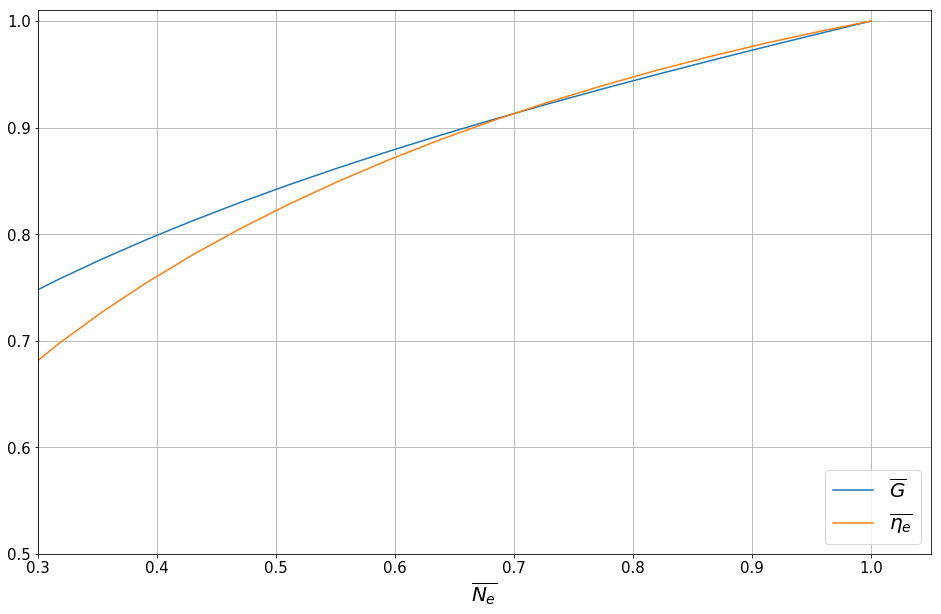

In [43]:
common.plot_common_characteristics(d2nr)
plt.show()

## Трехвальная установка без пром. охлаждения и пром. подогрева

### Загрузка данных

In [44]:
d3n = pd.read_json(data_root + '3n.json').sort_values('t')
d3ns = pd.read_json(data_root + '3n_simple.json')
d3ns = d3ns[d3ns.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [45]:
common.get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.efficiency == d3ns.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [46]:
common.get_3_shaft_nominal_parameters_note(
    d3ns[d3ns.specific_power == d3ns.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

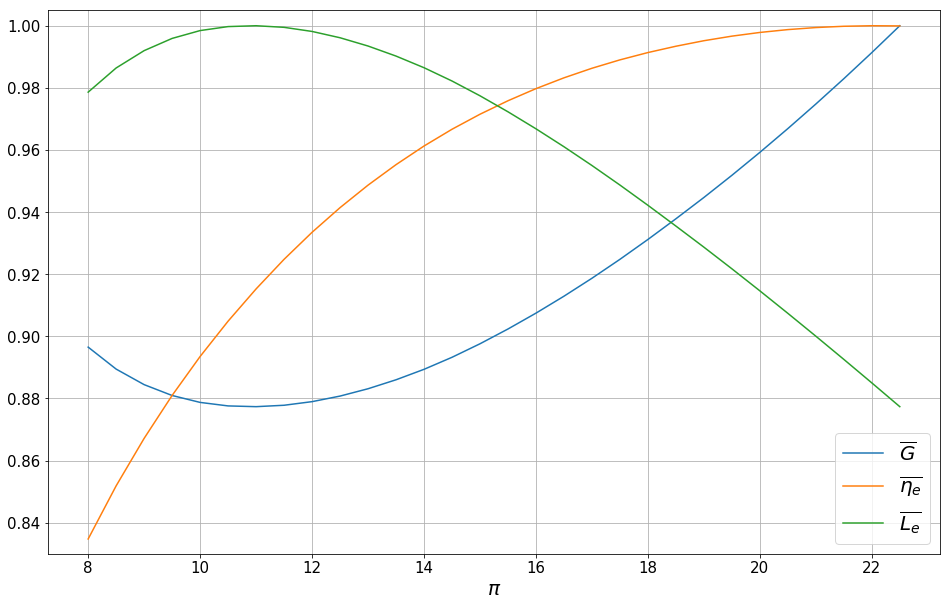

In [47]:
common.plot_nom_characteristic(d3ns)
plt.show()

### Построим характеристику установки на режимах частичной мощности

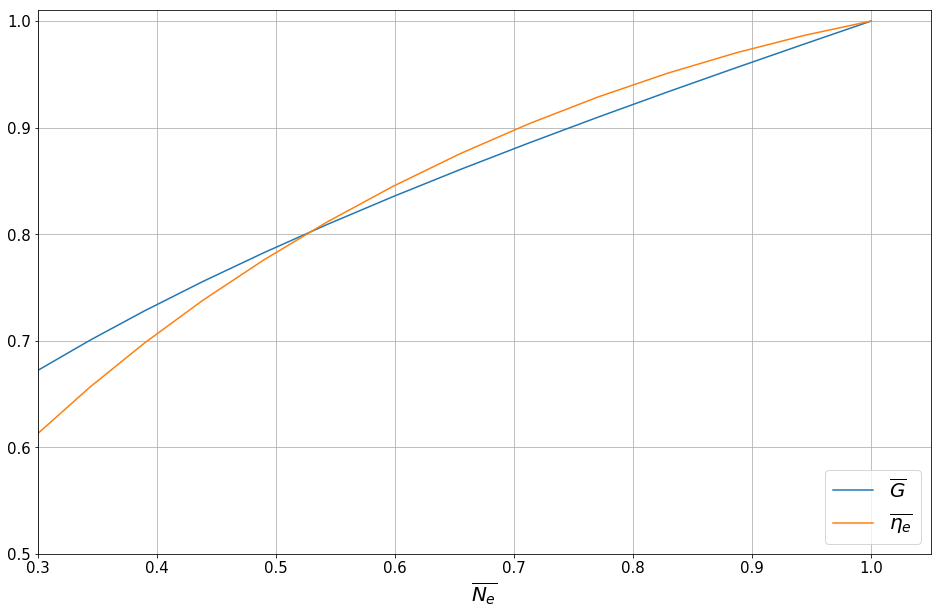

In [48]:
common.plot_common_characteristics(d3n)
plt.show()

## Трехвальная установка с пром. подогревом

### Загрузка данных

In [49]:
d3nb = pd.read_json(data_root + '3nb.json').sort_values('t')
d3nbs = pd.read_json(data_root + '3nb_simple.json')
d3nbs = d3nbs[d3nbs.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [50]:
common.get_3_shaft_nominal_parameters_note(
    d3nbs[d3nbs.efficiency == d3nbs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [51]:
common.get_3_shaft_nominal_parameters_note(
    d3nbs[d3nbs.specific_power == d3nbs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

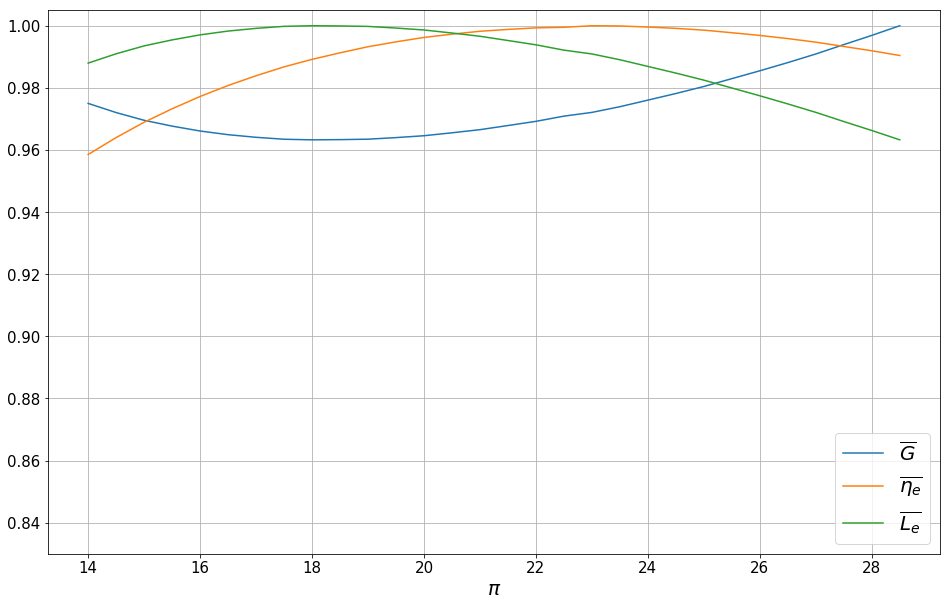

In [52]:
common.plot_nom_characteristic(d3nbs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

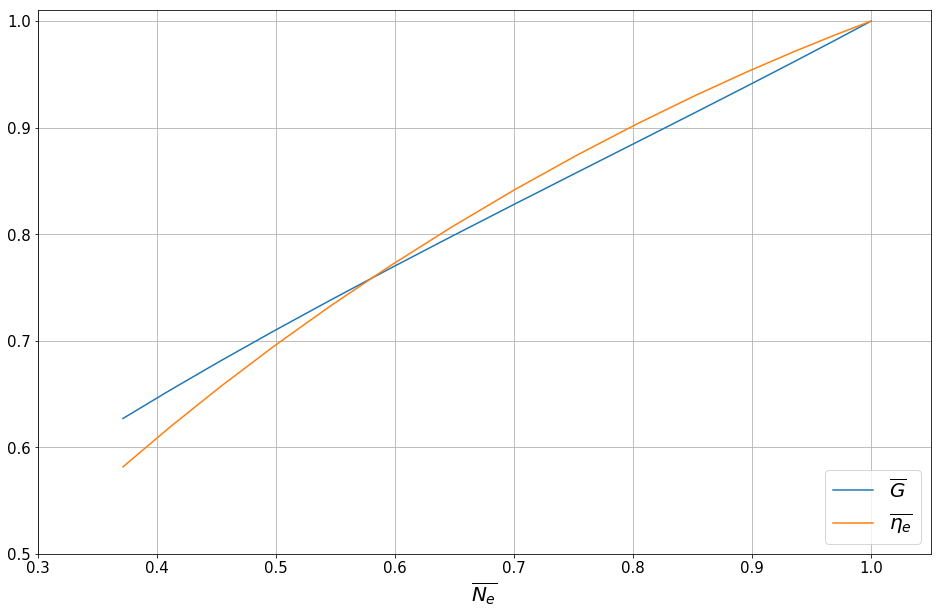

In [53]:
common.plot_common_characteristics(d3nb)
plt.show()

## Трехвальная установка с пром. охлаждением

### Загрузка данных

In [54]:
d3nc = pd.read_json(data_root + '3nc.json').sort_values('t')
d3ncs = pd.read_json(data_root + '3nc_simple.json')
d3ncs = d3ncs[d3ncs.pi_factor == 0.5].reset_index()

### Выведем параметры установки в точке максимального КПД

In [55]:
common.get_3_shaft_nominal_parameters_note(
    d3ncs[d3ncs.efficiency == d3ncs.efficiency.max()]
)

<IPython.core.display.Math object>

### Выведем параметры установки в точке максимальной удельной работы 

In [56]:
common.get_3_shaft_nominal_parameters_note(
    d3ncs[d3ncs.specific_power == d3ncs.specific_power.max()]
)

<IPython.core.display.Math object>

### Построим характеристику установки на номинальном режиме

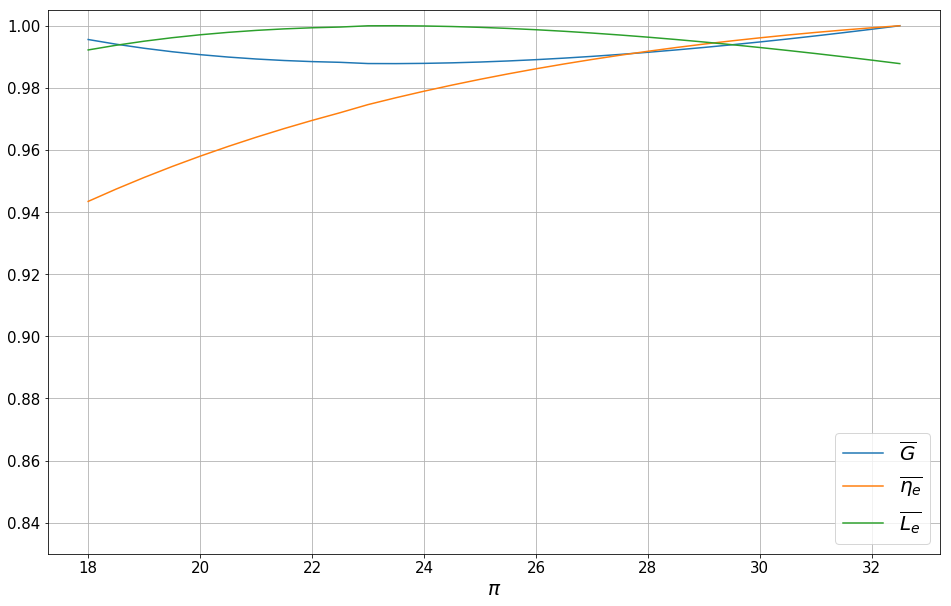

In [57]:
common.plot_nom_characteristic(d3ncs)
plt.show()

### Построим характеристику установки на режимах частичной мощности

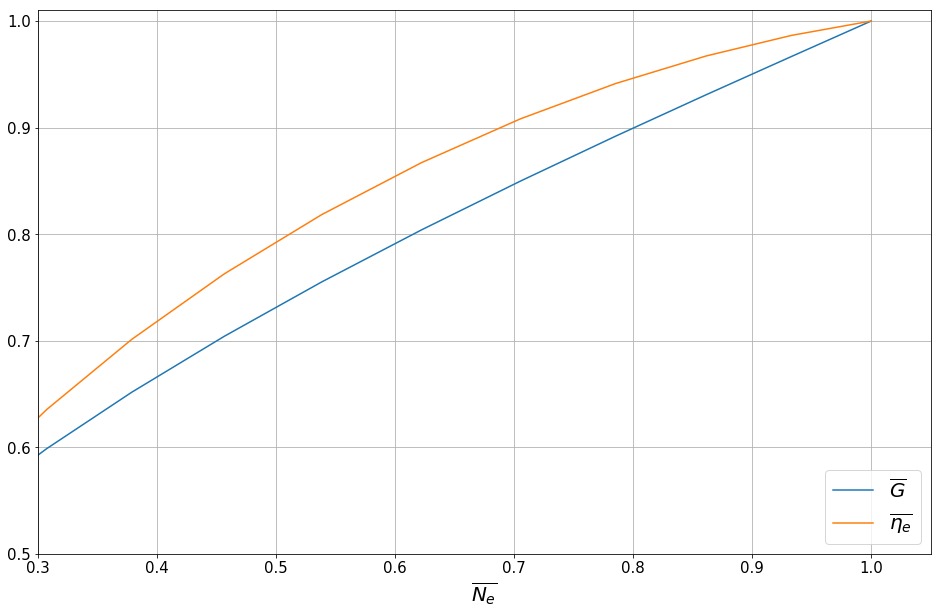

In [58]:
common.plot_common_characteristics(d3nc)
plt.show()

## Сравнительная характеристика всех установок на режимах частичной мощности

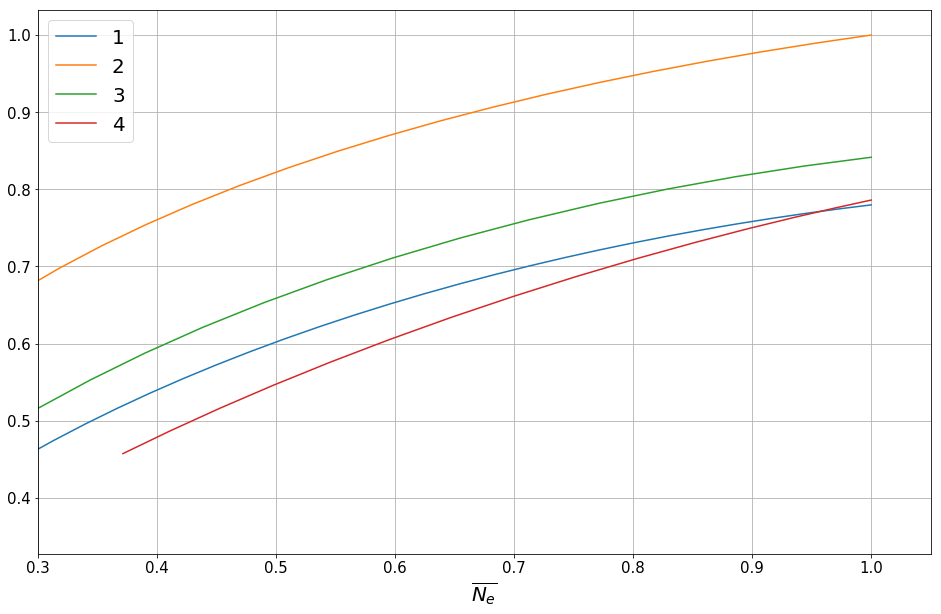

In [63]:
common.plot_rel_comparison([d2n, d2nr, d3n, d3nb], 'eta')
plt.legend(['1', '2', '3', '4'], loc='best', fontsize=20)
# plt.title('$Сравнение \ КПД \ установок \ на \ режимах \ частичной \ мощности$', fontsize=24)
plt.show()

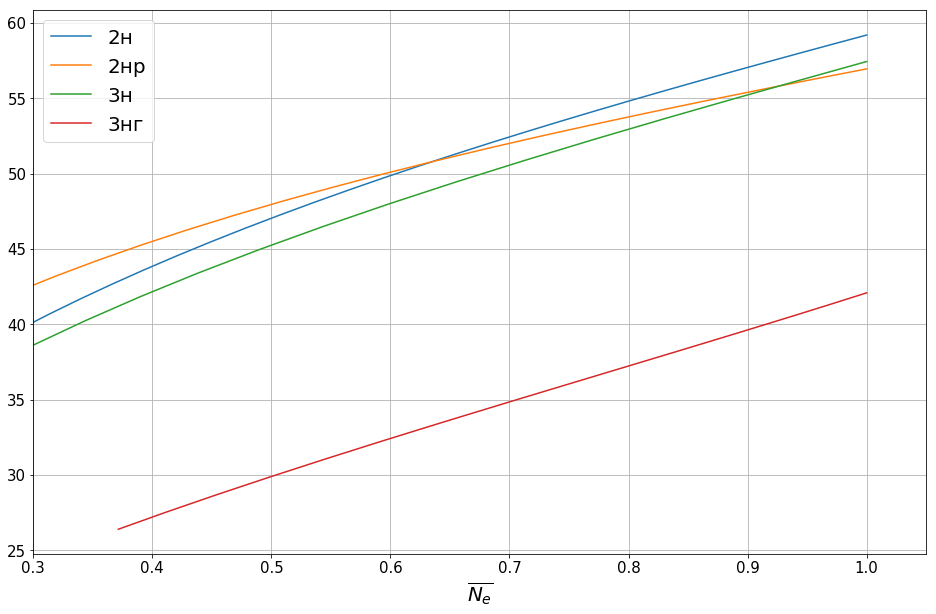

In [60]:
common.plot_comparison([d2n, d2nr, d3n, d3nb], 'mass_rate')
plt.legend(['2н', '2нр', '3н', '3нг'], loc='best', fontsize=20)
# plt.title('$Сравнение \ расходов \ воздуха \ установок \ на \ режимах \ частичной \ мощности$', fontsize=24)
plt.show()

In [61]:
d3nb

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
14,0.193426,0.969119,0.999373,0.999969,26.390839,2.255950,3.381856,3.898688,5.795558,2153.150081,5196.634742,5370.017288,1170
13,0.205787,0.974932,0.999513,0.999983,27.501661,2.335849,3.472404,3.991166,6.408946,2226.802652,5262.313248,5388.974849,1190
12,0.218302,0.980178,0.999629,0.999992,28.649162,2.419419,3.565818,4.083439,7.065714,2300.643977,5326.938071,5411.500532,1210
11,0.230903,0.984824,0.999725,0.999996,29.833012,2.506836,3.662185,4.175273,7.765847,2374.501814,5390.463141,5438.379983,1230
10,0.243503,0.988836,0.999802,0.999999,31.051731,2.598192,3.761646,4.266229,8.507985,2448.113577,5452.886011,5470.367779,1250
9,0.255972,0.992189,0.999863,0.999999,32.300537,2.693320,3.864320,4.355476,9.287884,2521.016594,5514.192438,5508.106644,1270
8,0.268139,0.994868,0.999910,1.000000,33.569931,2.791646,3.970259,4.441693,10.097213,2592.501436,5574.361580,5551.995987,1290
7,0.279782,0.996887,0.999944,1.000000,34.844682,2.892059,4.079437,4.523006,10.922503,2661.594434,5633.391740,5601.996564,1310
6,0.290658,0.998296,0.999968,1.000000,36.103332,2.992824,4.191685,4.597057,11.745281,2727.130324,5691.299288,5657.410628,1330
5,0.300531,0.999185,0.999984,1.000000,37.319211,3.091620,4.306605,4.661288,12.542935,2787.846430,5748.086999,5716.721807,1350


In [62]:
d2n

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,t
29,0.151936,0.999849,0.942482,35.288716,8.754929,1.747215,4.475499,3.148642,1744.974201,8937.536516,1160
28,0.162214,0.999897,0.948904,36.410648,9.072945,1.797161,4.509168,3.509115,1809.174491,9001.954146,1170
27,0.172241,0.999931,0.954807,37.510216,9.387817,1.846907,4.539988,3.884223,1871.468993,9063.319239,1180
26,0.182003,0.999955,0.960217,38.587550,9.699468,1.896471,4.568114,4.273185,1931.961554,9121.842436,1190
25,0.191483,0.999971,0.965158,39.641801,10.007581,1.945829,4.593668,4.674884,1990.695688,9177.658649,1200
24,0.200679,0.999982,0.969657,40.673740,10.312249,1.995017,4.616808,5.088659,2047.775681,9230.969849,1210
23,0.209563,0.999989,0.973733,41.681573,10.612923,2.043967,4.637632,5.512991,2103.182822,9281.827684,1220
22,0.218142,0.999993,0.977411,42.666460,10.909800,2.092720,4.656298,5.947270,2157.018262,9330.421661,1230
21,0.226410,0.999996,0.980716,43.628343,11.202774,2.141269,4.672933,6.390477,2209.322058,9376.863984,1240
20,0.234363,0.999998,0.983671,44.567602,11.491856,2.189619,4.687667,6.841728,2260.146137,9421.276059,1250
